# Homework 02
### Samuel Swain (sms5736) | 05/05/2023

### Libraries

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Import Keras modules for building a neural network
from keras.layers import Dense
from keras.models import Sequential

# Import scikit-learn modules for data preprocessing, model selection, and evaluation
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Question 2

Epoch: 100, Loss: 0.42650628089904785
Epoch: 200, Loss: 0.2836037576198578
Epoch: 300, Loss: 0.24696733057498932
Epoch: 400, Loss: 0.23271892964839935
Epoch: 500, Loss: 0.2305753082036972
Epoch: 600, Loss: 0.22944654524326324
Epoch: 700, Loss: 0.2283472865819931
Epoch: 800, Loss: 0.22743049263954163
Epoch: 900, Loss: 0.22645802795886993
Epoch: 1000, Loss: 0.22585822641849518


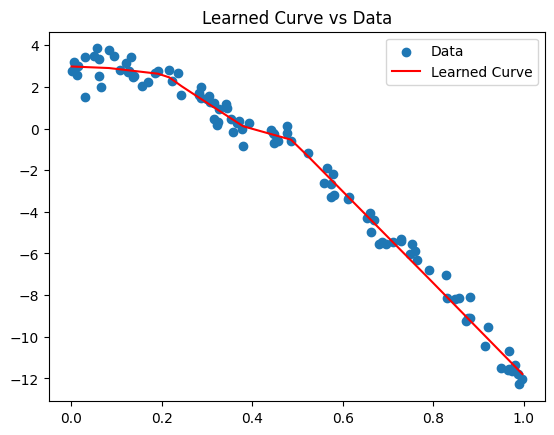

In [2]:
# Create synthetic dataset
X = np.random.rand(100, 1)
y = 5 * X**3 - 20 * X**2 + 3 + np.random.randn(100, 1) * 0.5

# Initialize the weights and biases
W1 = tf.Variable(tf.random.normal([1, 20]))
b1 = tf.Variable(tf.zeros([20]))
W2 = tf.Variable(tf.random.normal([20, 10]))
b2 = tf.Variable(tf.zeros([10]))
W3 = tf.Variable(tf.random.normal([10, 1]))
b3 = tf.Variable(tf.zeros([1]))

# Define the neural network
def neural_network(x):
    x = tf.cast(x, tf.float32)
    layer1 = tf.nn.relu(tf.matmul(x, W1) + b1)
    layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)
    output = tf.matmul(layer2, W3) + b3
    return output

# Define the loss function (Mean Squared Error)
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Define the optimizer (Stochastic Gradient Descent)
optimizer = tf.optimizers.SGD(learning_rate=0.01)

# Training loop
epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = neural_network(X)
        loss = loss_fn(y, y_pred)

    # Calculate gradients
    gradients = tape.gradient(loss, [W1, b1, W2, b2, W3, b3])

    # Update weights and biases
    optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2, W3, b3]))

    if (epoch + 1) % 100 == 0:
        print(f'Epoch: {epoch+1}, Loss: {loss.numpy()}')

# Plot the data and the learned regression curve
plt.scatter(X, y, label="Data")
plt.plot(np.sort(X, axis=0), neural_network(np.sort(X, axis=0)), color="red", label="Learned Curve")
plt.title("Learned Curve vs Data")
plt.legend()
plt.show()


# Question 3

In [3]:
# Define the model
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Preprocess data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

# Train and evaluate Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

# Train and evaluate Keras deep learning model
encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test_encoded = encoder.transform(y_test.reshape(-1, 1)).toarray()
history = model.fit(X_train_scaled, y_train_encoded, epochs=150, batch_size=10, verbose=0)
keras_pred_probs = model.predict(X_test_scaled, verbose=0)
keras_pred = np.argmax(keras_pred_probs, axis=-1)

# Model performance metrics
models = {'Logistic Regression': (lr_pred, y_test),
          'Random Forest': (rf_pred, y_test),
          'Keras Deep Learning': (keras_pred, y_test)}

for model_name, (predictions, true_labels) in models.items():
    accuracy = accuracy_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions, average='weighted')
    conf_matrix = confusion_matrix(true_labels, predictions)

    if model_name != "Keras Deep Learning":
        print(f"{model_name}:\n"
        f"Accuracy: {accuracy:.2f}\n"
        f"F1 Score: {f1:.2f}\n"
        f"Confusion Matrix:\n{conf_matrix}\n"
        f"\n----------------------\n")

    else:
        print(f"{model_name}:\n"
            f"Accuracy: {accuracy:.2f}\n"
            f"F1 Score: {f1:.2f}\n"
            f"Confusion Matrix:\n{conf_matrix}\n")

Logistic Regression:
Accuracy: 0.99
F1 Score: 0.99
Confusion Matrix:
[[29  0  0]
 [ 0 23  0]
 [ 0  1 22]]

----------------------

Random Forest:
Accuracy: 0.97
F1 Score: 0.97
Confusion Matrix:
[[29  0  0]
 [ 0 23  0]
 [ 0  2 21]]

----------------------

Keras Deep Learning:
Accuracy: 0.97
F1 Score: 0.97
Confusion Matrix:
[[29  0  0]
 [ 0 22  1]
 [ 0  1 22]]



There are a few possible reasons why Logistic regression could be performing slightly better than my Random Forest and Deep Learning Model presented below:

1. Dataset size: The Iris dataset is relatively small, with only 150 samples. Neural networks, like the Keras Deep Learning model, typically require larger datasets to outperform traditional machine learning methods. Logistic Regression, on the other hand, tends to work well on smaller datasets.

2. Complexity of the problem: The Iris dataset is not highly complex, with only 4 input features and 3 target classes. In this case, a simpler model like Logistic Regression might perform better, as it is less prone to overfitting. The Keras Deep Learning model, in contrast, might be overly complex for this problem, as it has more layers and neurons, which can lead to overfitting.

3. Model hyperparameters: The hyperparameters chosen for the Keras Deep Learning model might not be optimal for this specific problem. Adjusting parameters such as the number of hidden layers, neurons, or activation functions could potentially improve the model's performance. Similarly, the Random Forest model could benefit from tuning its hyperparameters, such as the number of trees or maximum depth.

4. Training iterations: The Keras Deep Learning model was trained for 150 epochs. It is possible that the model could achieve better performance with a different number of training epochs, or by using early stopping to prevent overfitting.

# Question 4

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________

----------------------------------

Epoch 1/10
32/32 [==============================] - 0s 1ms/step - loss: 0.1778
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 0.0580
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 4/10
32/32 [============================

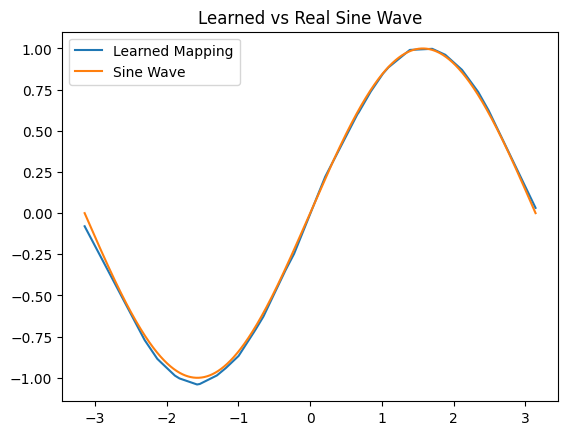

In [4]:
# Prepare the dataset
X = np.linspace(-np.pi, np.pi, 1000)
Y = np.sin(X)

# Build the model using Keras
model = Sequential([
    Dense(16, activation='relu', input_shape=(1,)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Summarize the model architecture
model.summary()
print("\n----------------------------------\n")

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mse')

# Train the model
model.fit(X, Y, epochs=10, batch_size=32)
print("\n----------------------------------\n")

# Test the model
test_input = np.linspace(-np.pi, np.pi, 1000)
test_output = model.predict(test_input)

# Plot the learned mapping and compare it with the sine wave
plt.plot(test_input, test_output, label='Learned Mapping')
plt.plot(test_input, np.sin(test_input), label='Sine Wave')
plt.title("Learned vs Real Sine Wave")
plt.legend()
plt.show()

In [ ]:
# Hello :)